# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=33.9983270797454, pvalue=4.143402060306214e-08)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

In [0]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.
from scipy import stats
#help(stats.binom)
b1 = stats.binom(n=100, p=0.6)

In [0]:
b1.mean() # not randomize but true distribution - so, always the same

60.0

In [0]:
#dir(b1)
b1.median()

60.0

In [0]:
# setting seed makes optimizing easier - you may not want your model to move
# around while you're trying to improve it so you can control while you optimize
import random
random.seed(100) # Reproducibility! Next line should give 2386
random.randint(0, 10000)

2386

In [0]:
#dir(stats.chi2) <- this is the distribution
#dir(stats.chisquare)

chi2 = stats.chi2(5) # 5 is the number of degrees of freedom
chi2.mean()

5.0

In [0]:
chi2.median() # has a right skew
# https://s3.amazonaws.com/magoosh-company-site/wp-content/uploads/sites/27/2018/02/06194109/skewness-mean-median-mode.jpg

4.351460191095526

In [0]:
help(stats.t.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



In [0]:
# Confidence intervals!
# Frequency that we would see values fall in this range (based on %)
# Assuming the center of the range is the center of the CI
# Confidence = 1-p
# Similar to hyppothesis testing, but centered at sample mean
# Better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
    """
    We want to Calculate a confidence interval around a sample mean for
    given data.
    Using t-distribution and two-tailed test, default 95% confidence.
    
    Arguments:
      data - iterable (list or numpy array) of sample observations
      confidence - level of confidence for the interval
      
    Returns:
      tuple of (mean, lower bound, upper bound)
    """
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = stats.sem(data) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html
    interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1) #dividing by 2 cause it's 2tailed
    # stats.t.ppf = gives the probability density function
    return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
    """
    Return a string with a pretty report of a confidence interval.
    
    Arguments:
      confidence_interval - tuple of (mean, lower bound, upper bound)
      
    Returns:
      None, but prints to screen the report
    """
    # We'll do formatted print statements
    #print('Mean: {}'.format(confidence_interval[0]))
    #print('Lower bound: {}'.format(confidence_interval[1]))
    #print('Upper bound: {}'.format(confidence_interval[2]))
    s = "Our mean lies in the interval [{:.2}, {:.2}]".format(confidence_interval[1],
         confidence_interval[2])
    return s

In [0]:
coinflips = np.random.binomial(n=1, p=0.5, size=100)
print(coinflips)

[0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0
 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1]


In [0]:
import pandas as pd
df=pd.DataFrame(coinflips)
df.describe()

,0
count,100.000000
mean,0.460000
std,0.500908
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [0]:
# Showing our true population mean is within interval (0.5 <- fair coin)
coinflip_interval = confidence_interval(coinflips, confidence=.95) # with .999 we get wider interval
coinflip_interval

(0.46, 0.3606089327527314, 0.5593910672472686)

In [0]:
report_confidence_interval(coinflip_interval)

'Our mean lies in the interval [0.29, 0.63]'

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

In [0]:
# TODO - your code!
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2018-12-05 00:46:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  13.9MB/s    in 3.0s    

2018-12-05 00:46:59 (13.9 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [0]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [0]:
!head drugsComTrain_raw.tsv

	drugName	condition	review	rating	date	usefulCount
206461	Valsartan	Left Ventricular Dysfunction	"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"""	9.0	May 20, 2012	27
95260	Guanfacine	ADHD	"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."""	8.0	April 27, 2010	192
92703	Lyb

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
# focus on 'rating' along with 'drugName' - group ratings by drug 
# and see which are preffered ACCORDING TO DRUG TYPE - apples to apples
# form hypothesis and test hypothesis
df = pd.read_table('drugsComTrain_raw.tsv')
df.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [0]:
name_count = df.drugName.value_counts()

In [0]:
df_500 = df[df.drugName.isin(name_count[name_count >= 500].index)]

In [0]:
bip_df = df_500[df_500.condition == 'Bipolar Disorde']

In [0]:
#Lamotrigine = most rated Bipolar disorder drug
bip_lamotrigine = df[df.drugName == 'Lamotrigine']

In [0]:
bip_lamotrigine.describe()

,Unnamed: 0,rating,usefulCount
count,591.000000,591.000000,591.000000
mean,212027.813875,8.113367,40.379019
std,238.259819,2.721354,40.146661
min,211619.000000,1.000000,0.000000
25%,211827.500000,8.000000,13.000000
50%,212022.000000,9.000000,28.000000
75%,212223.500000,10.000000,56.000000
max,212497.000000,10.000000,333.000000


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 23.9MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
bip_lamotrigine.rating.value_counts()

10.0    262
9.0     126
8.0      66
1.0      40
7.0      24
6.0      18
5.0      17
3.0      14
2.0      13
4.0      11
Name: rating, dtype: int64

In [0]:
#stderr = stats.sem(bip_lamotrigine.rating)
#interval = stderr * stats.t.ppf((1 + .95) / 2., 591 - 1)
#lower = 8.113367 - interval
#upper = 8.113367 + interval
#print(lower, upper)

interval = stats.norm.interval(0.95, loc=8.113367, scale=2.721354/np.sqrt(591))
interval

(7.893965602232362, 8.332768397767639)

In [0]:
lamotrigine_ratings = bip_lamotrigine.rating.tolist()

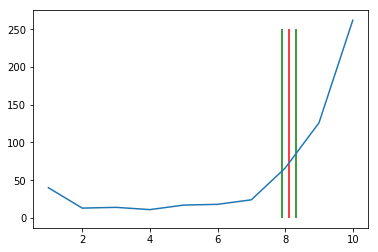

In [0]:
ax = sns.lineplot(x=bip_lamotrigine.rating.value_counts().index, y=bip_lamotrigine.rating.value_counts().values)
ax.vlines(x=bip_lamotrigine.rating.mean(), ymin=0, ymax=250, color='red', label='mean' )
ax.vlines(x=interval[0], ymin=0, ymax=250, color='green', label='95% CI' )
ax.vlines(x=interval[1], ymin=0, ymax=250, color='green' );

### Interpretation

If we could repeat this process this would be the range were we would most likely find our results  -  95% confident that the true population mean of rating for 'Lamotrigine' lies between 7.89 and 8.33

### Confidence Interval Function
CIs of Bipolar Disorder Drugs

In [0]:
bip_df.drugName.value_counts()

Lamotrigine       406
Quetiapine        294
Aripiprazole      166
Topiramate         67
Gabapentin         64
Clonazepam         50
Venlafaxine        37
Bupropion          32
Sertraline         30
Escitalopram       29
Duloxetine         22
Cymbalta           20
Lexapro            19
Zoloft              8
Desvenlafaxine      7
Citalopram          7
Pristiq             6
Name: drugName, dtype: int64

In [0]:
def conf_interval(drug_name, confidence=0.95):
    """
    Calculate confidence interval for mean ratings of given data
    
    Arguments:
      raitings - iterable(list or numpy array) of sample ratings observations
      confidence - level of confidence for interval - 0.95 default
      
    Returns:
      tuple of (mean, lower bound, upper bound)
    """
    
    data = bip_df[bip_df.drugName == drug_name]
    ratings = data.rating.tolist()
    mean = np.mean(ratings)
    n = len(ratings)
    stderr = stats.sem(ratings)
    interval = stderr * stats.t.ppf((1 + confidence) / 2., n-1) # div by 2 = two-tailed test
    return (mean, mean-interval, mean+interval)

def report_ci(conf_interval):
    """
    Return a string with report of confidence interval
    
    Arguments:
      conf_interval - tuple of (mean, lower bound, upper bound)
    
    Returns:
      Confidence interval report
    """
    
    report = "Interval: [{:.2}, {:2}]".format(conf_interval[1], conf_interval[2])
    
    return report

In [0]:
bip_drugs = bip_df.drugName.unique()

for drug in bip_drugs:
    print('Drug', 'Mean', 'Lower Bound', 'Upper Bound')
    print(drug, conf_interval(drug))

Drug Mean Lower Bound Upper Bound
Aripiprazole (5.734939759036145, 5.210234675536617, 6.259644842535673)
Drug Mean Lower Bound Upper Bound
Lamotrigine (8.27832512315271, 8.029537899761987, 8.527112346543433)
Drug Mean Lower Bound Upper Bound
Quetiapine (7.2312925170068025, 6.89398823435595, 7.568596799657655)
Drug Mean Lower Bound Upper Bound
Sertraline (7.433333333333334, 6.425240095898988, 8.44142657076768)
Drug Mean Lower Bound Upper Bound
Clonazepam (8.36, 7.579558774172911, 9.140441225827088)
Drug Mean Lower Bound Upper Bound
Lexapro (6.894736842105263, 5.4586821931284994, 8.330791491082026)
Drug Mean Lower Bound Upper Bound
Escitalopram (6.931034482758621, 5.850695822425474, 8.011373143091769)
Drug Mean Lower Bound Upper Bound
Gabapentin (8.515625, 7.956199779749607, 9.075050220250393)
Drug Mean Lower Bound Upper Bound
Bupropion (6.65625, 5.375452216259024, 7.937047783740976)
Drug Mean Lower Bound Upper Bound
Citalopram (7.857142857142857, 5.627991426692233, 10.08629428759348)
Dr